In [1]:
from keras.datasets import reuters
(train_data,train_label),(test_data,test_label)=reuters.load_data(num_words=10000)

In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [3]:
word_index=reuters.get_word_index()
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [4]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [5]:
decorded_review=' '.join(reverse_word_index.get(i) for i in train_data[1])
decorded_review

'the termination payment airport takes 6 of geological 3 6 602 begin up said fully bank expects commodity total is giant a of this takes of series termination payment airport mln a for capital 1 pre 50 american east said in council takes of of france a but u any 4 s 1st losses pct dlrs'

In [6]:
import numpy as np
def vectorise_sequences(sequences,dimention=10000):
    result=np.zeros((len(sequences),dimention))
    print(result.shape)
    for i,sequence in enumerate(sequences):
        result[i,sequence]=1
    return result

In [7]:
xtrain=vectorise_sequences(train_data)
xtest=vectorise_sequences(test_data)

(8982, 10000)
(2246, 10000)


In [8]:
print(train_label)

[ 3  4  3 ... 25  3 25]


In [9]:
print(np.unique(train_label))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [10]:
from keras.utils import to_categorical
train_label=to_categorical(train_label)
test_label=to_categorical(test_label)
print(train_label[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

C:\Users\archa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
x_val=xtrain[:1000]
y_val=train_label[:1000]
org_xtrain=xtrain[1000:]
org_ytrain=train_label[1000:]

In [14]:
history=model.fit(org_xtrain,org_ytrain,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.3536 - loss: 3.3225 - val_accuracy: 0.6250 - val_loss: 1.9168
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6484 - loss: 1.7136 - val_accuracy: 0.6720 - val_loss: 1.4254
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7338 - loss: 1.2570 - val_accuracy: 0.7400 - val_loss: 1.2214
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7830 - loss: 1.0080 - val_accuracy: 0.7620 - val_loss: 1.1068
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8183 - loss: 0.8364 - val_accuracy: 0.7820 - val_loss: 1.0444
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8563 - loss: 0.6826 - val_accuracy: 0.7750 - val_loss: 1.0253
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8633 - loss: 0.6130 - val_accuracy: 0.7980 - val_loss: 0.9486
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8974 - loss: 0.4983 - val_accuracy: 0.8070 - v

In [15]:
history.history

{'accuracy': [0.470558762550354,
  0.670508623123169,
  0.7406665086746216,
  0.7853921055793762,
  0.8193435072898865,
  0.8517915606498718,
  0.8730894327163696,
  0.8931345343589783,
  0.913054347038269,
  0.9215735197067261,
  0.9332247376441956,
  0.9401152729988098,
  0.9436231255531311,
  0.9481332898139954,
  0.9507642388343811,
  0.9525181651115417,
  0.9545226693153381,
  0.9540215730667114,
  0.9571536183357239,
  0.9559007883071899],
 'loss': [2.8731400966644287,
  1.5870662927627563,
  1.2171616554260254,
  0.9934256076812744,
  0.8297950625419617,
  0.6888319849967957,
  0.584089994430542,
  0.4981713593006134,
  0.4139013886451721,
  0.36224067211151123,
  0.307749480009079,
  0.2703682780265808,
  0.24002161622047424,
  0.21227826178073883,
  0.18929199874401093,
  0.18097178637981415,
  0.16431750357151031,
  0.1551344394683838,
  0.1433703750371933,
  0.14137232303619385],
 'val_accuracy': [0.625,
  0.671999990940094,
  0.7400000095367432,
  0.7620000243186951,
  0.78

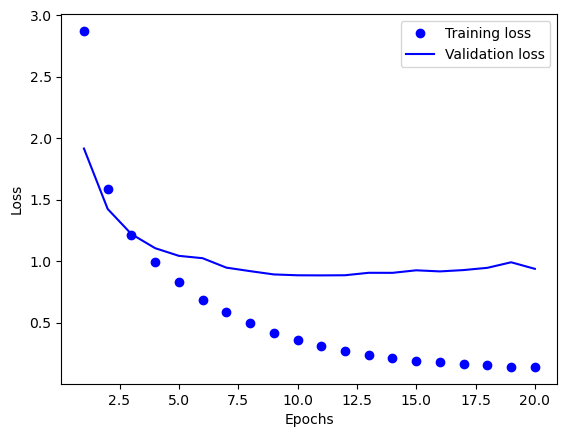

In [16]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

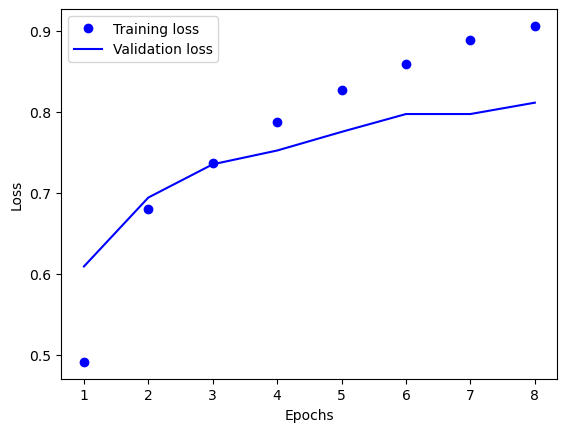

In [32]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training loss')
plt.plot(epochs,val_acc,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(val_acc)
print(np.argmax(val_acc))

In [19]:
print(val_loss)
print(np.argmin(val_loss))

[0.625, 0.671999990940094, 0.7400000095367432, 0.7620000243186951, 0.7820000052452087, 0.7749999761581421, 0.7979999780654907, 0.8069999814033508, 0.8090000152587891, 0.8069999814033508, 0.8199999928474426, 0.8159999847412109, 0.8119999766349792, 0.8109999895095825, 0.8080000281333923, 0.8100000023841858, 0.8069999814033508, 0.8009999990463257, 0.796999990940094, 0.8100000023841858]
0


In [18]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

C:\Users\archa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(org_xtrain,org_ytrain,epochs=8,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4007 - loss: 3.0116 - val_accuracy: 0.6090 - val_loss: 1.7591
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6642 - loss: 1.5736 - val_accuracy: 0.6940 - val_loss: 1.3774
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7258 - loss: 1.2247 - val_accuracy: 0.7350 - val_loss: 1.1959
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7837 - loss: 0.9629 - val_accuracy: 0.7520 - val_loss: 1.0901
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8261 - loss: 0.7932 - val_accuracy: 0.7750 - val_loss: 1.0108
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8564 - loss: 0.6695 - val_accuracy: 0.7970 - val_loss: 0.9508
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8884 - loss: 0.5575 - val_accuracy: 0.7970 - val_loss: 0.9432
Epoch 8/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9046 - loss: 0.4617 - val_accuracy: 0.8110 - val_loss:

In [25]:
result=model.evaluate(xtest,test_label)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7862 - loss: 0.9498


In [26]:
predictions=model.predict(xtest)
predictions

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[9.62653394e-06, 6.10204646e-04, 6.01974307e-06, ...,
        3.88961553e-06, 7.19434229e-06, 8.34543152e-06],
       [4.71275747e-02, 1.04322016e-01, 1.81683749e-02, ...,
        2.94018723e-03, 1.00379966e-05, 1.51277607e-04],
       [5.40307770e-03, 7.63676286e-01, 5.30899223e-03, ...,
        2.74943630e-03, 3.95718707e-05, 7.05054495e-04],
       ...,
       [2.75488328e-05, 8.00764945e-04, 6.16166290e-05, ...,
        7.97468310e-05, 4.42434575e-05, 5.59329128e-05],
       [4.17588372e-03, 1.19978547e-01, 3.95156303e-03, ...,
        1.40511314e-03, 1.24097581e-03, 1.62103539e-03],
       [5.87660028e-03, 4.12307143e-01, 2.34329924e-02, ...,
        5.10048401e-03, 2.75596612e-05, 3.01011110e-04]], dtype=float32)

In [27]:
np.sum(predictions[0])

0.9999999